In [1]:
import openmc
import openmc.lib
import numpy as np 
from matplotlib import pyplot as plt

### Define materials 
Fill atomic number density data for
- Fuels: Fuel (UOF), Blanket (UOB)
- Structural material: 15-15Ti (SS), 316Ti (Ti316)
- Sodium (Na_FU)

In [2]:
###############################################################################
#                 Exporting to OpenMC materials.xml file
###############################################################################

# UO2 for Fuel 
# --- UOF at T=250.0 deg-C
UOF = openmc.Material( name='UOF')
UOF.temperature=523.15
UOF.set_density('sum')
UOF.add_nuclide('U235',       ,'ao')
UOF.add_nuclide('U238',       ,'ao')
UOF.add_nuclide('O16',        ,'ao')

# UO2 for Blanket
# --- UOB at T=250.0 deg-C
UOB = openmc.Material( name='UOB')
UOB.temperature=523.15
UOB.set_density('sum')
UOB.add_nuclide('U235',       ,'ao')
UOB.add_nuclide('U238',       ,'ao')
UOB.add_nuclide('O16',        ,'ao')

# 15-15Ti Stainless Steel
# --- SS at T=250.0 deg-C
SS = openmc.Material( name='SS')
SS.temperature=523.15
SS.set_density('atom/b-cm',density=       )
SS.add_nuclide('Fe54' ,        )
SS.add_nuclide('Fe56' ,        )
SS.add_nuclide('Fe57' ,        )
SS.add_nuclide('Fe58' ,        )
SS.add_nuclide('Cr50' ,        )
SS.add_nuclide('Cr52' ,        )
SS.add_nuclide('Cr53' ,        )
SS.add_nuclide('Cr54' ,        )
SS.add_nuclide('Ni58' ,        )
SS.add_nuclide('Ni60' ,        )
SS.add_nuclide('Ni61' ,        )
SS.add_nuclide('Ni62' ,        )
SS.add_nuclide('Ni64' ,        )
SS.add_nuclide('Mo92' ,        )
SS.add_nuclide('Mo94' ,        )
SS.add_nuclide('Mo95' ,        )
SS.add_nuclide('Mo96' ,        )
SS.add_nuclide('Mo97' ,        )
SS.add_nuclide('Mo98' ,        )
SS.add_nuclide('Mo100',        )
SS.add_nuclide('Mn55' ,        )
SS.add_nuclide('C0'   ,        )
SS.add_nuclide('Ti46' ,        )
SS.add_nuclide('Ti47' ,        )
SS.add_nuclide('Ti48' ,        )
SS.add_nuclide('Ti49' ,        )
SS.add_nuclide('Ti50' ,        )
SS.add_nuclide('Si28' ,        )
SS.add_nuclide('Si29' ,        )
SS.add_nuclide('Si30' ,        )

# Ti316 Stainless Steel
# --- 316Ti at T=250.0 deg-C
Ti316 = openmc.Material( name='Ti316')
Ti316.temperature=523.15
Ti316.set_density('atom/b-cm',density=       )
Ti316.add_nuclide('Fe54' ,         ) 
Ti316.add_nuclide('Fe56' ,         ) 
Ti316.add_nuclide('Fe57' ,         ) 
Ti316.add_nuclide('Fe58' ,         ) 
Ti316.add_nuclide('Cr50' ,         ) 
Ti316.add_nuclide('Cr52' ,         ) 
Ti316.add_nuclide('Cr53' ,         ) 
Ti316.add_nuclide('Cr54' ,         ) 
Ti316.add_nuclide('Ni58' ,         ) 
Ti316.add_nuclide('Ni60' ,         ) 
Ti316.add_nuclide('Ni61' ,         ) 
Ti316.add_nuclide('Ni62' ,         ) 
Ti316.add_nuclide('Ni64' ,         ) 
Ti316.add_nuclide('Mo92' ,         ) 
Ti316.add_nuclide('Mo94' ,         ) 
Ti316.add_nuclide('Mo95' ,         ) 
Ti316.add_nuclide('Mo96' ,         ) 
Ti316.add_nuclide('Mo97' ,         ) 
Ti316.add_nuclide('Mo98' ,         ) 
Ti316.add_nuclide('Mo100',         ) 
Ti316.add_nuclide('Mn55' ,         ) 
Ti316.add_nuclide('C0'   ,         ) 
Ti316.add_nuclide('Ti46' ,         ) 
Ti316.add_nuclide('Ti47' ,         ) 
Ti316.add_nuclide('Ti48' ,         ) 
Ti316.add_nuclide('Ti49' ,         ) 
Ti316.add_nuclide('Ti50' ,         ) 
Ti316.add_nuclide('Si28' ,         ) 
Ti316.add_nuclide('Si29' ,         ) 
Ti316.add_nuclide('Si30' ,         ) 

# -------------------------------------------------------
# --- Sodium for all regions
# -------------------------------------------------------
Na_FU = openmc.Material( name='Na_FU')
Na_FU.temperature=523.15
Na_FU.set_density('sum')
Na_FU.add_nuclide('Na23',         )

# -------------------------------------------------------
# --- He in different locations
# -------------------------------------------------------
He = openmc.Material( name='He')
He.temperature=523.15
He.set_density('sum')
He.add_nuclide('He4',1.00000E-11)

vacuum = openmc.Material( name='vacuum')
vacuum.temperature=523.15
vacuum.set_density('sum')
vacuum.add_nuclide('He4',1.00000E-23)

# -------------------------------------------------------
# --- Homogeneous mixtures
# -------------------------------------------------------
# ---    OpenMC format
# ---    <matname> = openmc.Material.mix_materials ([<mat1>,<mat2>, ...], [<frac1>,<frac2>, ...], 'xx')
# ---    'xx': Mass fractions are entered with 'wo', and volume fractions with 'vo'.
#
# --- Homogeneous spring-NA
HOMOG_SPR_FU = openmc.Material.mix_materials([Ti316,He], [0.173,0.827], 'vo', name='HOMOG_SPR_FU')
HOMOG_SPR_FU.temperature=523.15

materials_file = openmc.Materials([
UOF,
UOB,
SS,
Ti316,
He,
vacuum,
Na_FU,
HOMOG_SPR_FU
])

materials_file.export_to_xml()


### Define surfaces 
Fill below data:
- pin surfaces (cyl_FI_hole,cyl_FI_fuel,cyl_FE_fuel,cyl_Clad61_IN,cyl_Clad61_OU)
- SA wrapper hexagons (hex_WR_IN,hex_WR_OU,hex_SA_PITCH)
- axial surfaces (pz_FUEL_UBL,pz_FUEL_FIS,pz_FUEL_LBL)
- hexcore (same value as hex_SA_PITCH)

In [3]:
#-----------------------------------------------------------------------------------
# --- Pin surfaces - fuel
#-----------------------------------------------------------------------------------       
# --- 61 pin lattices (same inner/outer clad)
#
# ---  Fuel fissile
cyl_FI_hole = openmc.ZCylinder( x0=0, y0=0, r=       , name='cyl_FI_hole') # Fissile fuel pellet inner hole radius (cm)
cyl_FI_fuel = openmc.ZCylinder( x0=0, y0=0, r=       , name='cyl_FI_fuel') # Fissile fuel pellet radius (cm)
# ---  Fuel fertile
cyl_FE_fuel = openmc.ZCylinder( x0=0, y0=0, r=       , name='cyl_FE_fuel') # Fertile fuel pellet radius (cm)
# --- Cladding
cyl_Clad61_IN = openmc.ZCylinder( x0=0, y0=0, r=     , name='cyl_Clad61_IN') # Inner clad radius (cm)
cyl_Clad61_OU = openmc.ZCylinder( x0=0, y0=0, r=     , name='cyl_Clad61_OU') # Outer clad radius (cm)

#-----------------------------------------------------------------------------------
# --- Radial surfaces - Fuel assembly
#-----------------------------------------------------------------------------------
hex_HEA_IN   = openmc.hexagonal_prism(orientation='y', origin=(0.0, 0.0),edge_length= 2.909856904) # pitch = 2.52001, Head inner flat-to-flat/2 (cm)
cyl_USH_hole = openmc.ZCylinder( x0=0, y0=0, r=1.60662, name='cyl_USH_hole')                       #                  Upper shield inner hole radius (cm)                       
hex_UCN_IN   = openmc.hexagonal_prism(orientation='y', origin=(0.0, 0.0),edge_length= 3.234720353) # pitch = 2.80135, Upper connector inner flat-to-flat/2 (cm)             
hex_LCN_IN   = openmc.hexagonal_prism(orientation='y', origin=(0.0, 0.0),edge_length= 3.310260862) # pitch = 2.86677, Lower connector inner flat-to-flat/2 (cm) 

# --- SA wrapper hexagons
hex_WR_IN    = openmc.hexagonal_prism(orientation='y', origin=(0.0, 0.0),edge_length=            ) # pitch=    , Wrapper tube inner flat-to-flat/2 (cm) 
hex_WR_OU    = openmc.hexagonal_prism(orientation='y', origin=(0.0, 0.0),edge_length=            ) # pitch=    , Wrapper tube outer flat-to-flat/2 (cm) 
hex_SA_PITCH = openmc.hexagonal_prism(orientation='y', origin=(0.0, 0.0),edge_length=            ) # pitch=    , S/A Pitch          flat-to-flat/2 (cm)


#-----------------------------------------------------------------------------------
# --- Axial surfaces - Fuel assembly 
#-----------------------------------------------------------------------------------
# --- fuel - axial s/a regions - upper boundary
pz_FUEL_HEA = openmc.ZPlane( z0= 220.473 ,name='pz_FUEL_HEA') # 01 - Head
pz_FUEL_USH = openmc.ZPlane( z0= 197.377 ,name='pz_FUEL_USH') # 02 - Upper shield
pz_FUEL_UCN = openmc.ZPlane( z0= 150.183 ,name='pz_FUEL_UCN') # 03 - Upper connector
pz_FUEL_TEP = openmc.ZPlane( z0= 144.158 ,name='pz_FUEL_TEP') # 04 - Top end plug
pz_FUEL_SPR = openmc.ZPlane( z0= 143.154 ,name='pz_FUEL_SPR') # 05 - Spring
pz_FUEL_UBL = openmc.ZPlane( z0=         ,name='pz_FUEL_UBL') # 06 - Upper blanket
pz_FUEL_FIS = openmc.ZPlane( z0=         ,name='pz_FUEL_FIS') # 07 - Fissile
pz_FUEL_LBL = openmc.ZPlane( z0=         ,name='pz_FUEL_LBL') # 08 - Lower blanket
pz_FUEL_LGP = openmc.ZPlane( z0= 57.437  ,name='pz_FUEL_LGP') # 09 - Lower gas plenum
pz_FUEL_BEP = openmc.ZPlane( z0= 12.251  ,name='pz_FUEL_BEP') # 10 - Bottom end plug
pz_FUEL_LCN = openmc.ZPlane( z0= 8.736   ,name='pz_FUEL_LCN') # 11 - Lower connector


#-----------------------------------------------------------------------------------
# --- Core surfaces
#-----------------------------------------------------------------------------------
pz_BOT   = openmc.ZPlane( z0= 0.00    ,name='pz_BOT', boundary_type='vacuum') 
pz_TOP   = openmc.ZPlane( z0= 221.778 ,name='pz_TOP', boundary_type='vacuum') # 221.778 

# Surface define for CORE 
hexcore = openmc.hexagonal_prism(orientation='x', origin=(0.0, 0.0),edge_length=        , boundary_type='reflective')                                  

### Define pins 
Define 2D pin for fuel pin (p_FU_FIS) and blanket pins (p_FU_UBL, p_FU_LBL)

In [4]:
  # -------------------------------------------------------
# --- Pins - Fuel assemblies
# -------------------------------------------------------

# --- Void
# a_OU
c_VOID = openmc.Cell( name='c_VOID')
c_VOID.fill = None 
a_OU = openmc.Universe() 
a_OU.add_cells([c_VOID])

# --- Top end plug (TEP)
c_FU_TEP1 = openmc.Cell( name='c_FU_TEP1') 
c_FU_TEP2 = openmc.Cell( name='c_FU_TEP2')

c_FU_TEP1.region = -cyl_Clad61_OU
c_FU_TEP2.region = +cyl_Clad61_OU

c_FU_TEP1.fill = SS 
c_FU_TEP2.fill = Na_FU

p_FU_TEP = openmc.Universe()
p_FU_TEP.add_cells([
c_FU_TEP1,
c_FU_TEP2
])

# --- Spring (SPR)
c_FU_SPR1 = openmc.Cell( name='c_FU_SPR1')
c_FU_SPR2 = openmc.Cell( name='c_FU_SPR2')
c_FU_SPR3 = openmc.Cell( name='c_FU_SPR3')

c_FU_SPR1.region = -cyl_Clad61_IN
c_FU_SPR2.region = +cyl_Clad61_IN & -cyl_Clad61_OU 
c_FU_SPR3.region = +cyl_Clad61_OU

c_FU_SPR1.fill = HOMOG_SPR_FU
c_FU_SPR2.fill = SS    
c_FU_SPR3.fill = Na_FU

p_FU_SPR = openmc.Universe()
p_FU_SPR.add_cells([
c_FU_SPR1,
c_FU_SPR2,
c_FU_SPR3
])

# --- Upper fuel fertile/blanket (UBL)
c_FU_UBL_1 = openmc.Cell( name='c_FU_UBL_1')
c_FU_UBL_2 = openmc.Cell( name='c_FU_UBL_2')
c_FU_UBL_3 = openmc.Cell( name='c_FU_UBL_3')
c_FU_UBL_4 = openmc.Cell( name='c_FU_UBL_4')

c_FU_UBL_1.region =   
c_FU_UBL_2.region =   
c_FU_UBL_3.region =   
c_FU_UBL_4.region =   
  
c_FU_UBL_1.fill =  
c_FU_UBL_2.fill =  
c_FU_UBL_3.fill =  
c_FU_UBL_4.fill =  

p_FU_UBL = openmc.Universe()
p_FU_UBL.add_cells([c  _FU_UBL_1, c_FU_UBL_2, c_FU_UBL_3, c_FU_UBL_4])

# --- Fuel fissile (FIS)
c_FU_FIS_0 = openmc.Cell( name='c_FU_FIS_0')
c_FU_FIS_1 = openmc.Cell( name='c_FU_FIS_1')
c_FU_FIS_2 = openmc.Cell( name='c_FU_FIS_2')
c_FU_FIS_3 = openmc.Cell( name='c_FU_FIS_3')
c_FU_FIS_4 = openmc.Cell( name='c_FU_FIS_4')

c_FU_FIS_0.region =   
c_FU_FIS_1.region =   
c_FU_FIS_2.region =   
c_FU_FIS_3.region =   
c_FU_FIS_4.region =   
  
c_FU_FIS_0.fill =  
c_FU_FIS_1.fill =  
c_FU_FIS_2.fill =  
c_FU_FIS_3.fill =  
c_FU_FIS_4.fill =  

p_FU_FIS = openmc.Universe()
p_FU_FIS.add_cells([
c_FU_FIS_0,
c_FU_FIS_1,
c_FU_FIS_2,
c_FU_FIS_3,
c_FU_FIS_4
])

# --- Lower fuel fertile/blanket (LBL)
c_FU_LBL_1 = openmc.Cell( name='c_FU_LBL_1')
c_FU_LBL_2 = openmc.Cell( name='c_FU_LBL_2')
c_FU_LBL_3 = openmc.Cell( name='c_FU_LBL_3')
c_FU_LBL_4 = openmc.Cell( name='c_FU_LBL_4')

c_FU_LBL_1.region =  
c_FU_LBL_2.region =   
c_FU_LBL_3.region =   
c_FU_LBL_4.region =  
 
c_FU_LBL_1.fill = 
c_FU_LBL_2.fill = 
c_FU_LBL_3.fill = 
c_FU_LBL_4.fill = 

p_FU_LBL = openmc.Universe()
p_FU_LBL.add_cells([
c_FU_LBL_1,
c_FU_LBL_2,
c_FU_LBL_3,
c_FU_LBL_4
])

# --- Lower gas plenum (LGP)
c_FU_LGP1 = openmc.Cell( name='c_FU_LGP1')
c_FU_LGP2 = openmc.Cell( name='c_FU_LGP2')
c_FU_LGP3 = openmc.Cell( name='c_FU_LGP3')

c_FU_LGP1.region = -cyl_Clad61_IN
c_FU_LGP2.region = +cyl_Clad61_IN & -cyl_Clad61_OU
c_FU_LGP3.region = +cyl_Clad61_OU

c_FU_LGP1.fill = He
c_FU_LGP2.fill = SS
c_FU_LGP3.fill = Na_FU

p_FU_LGP = openmc.Universe()
p_FU_LGP.add_cells([
c_FU_LGP1,
c_FU_LGP2,
c_FU_LGP3
])

# --- Bottop end plug (BEP)                     
c_FU_BEP1 = openmc.Cell( name='c_FU_BEP1') 
c_FU_BEP2 = openmc.Cell( name='c_FU_BEP2')

c_FU_BEP1.region = -cyl_Clad61_OU
c_FU_BEP2.region = +cyl_Clad61_OU

c_FU_BEP1.fill = SS 
c_FU_BEP2.fill = Na_FU

p_FU_BEP = openmc.Universe()
p_FU_BEP.add_cells([
c_FU_BEP1,
c_FU_BEP2
])

# --- Na pins
# Outlet Na
c_FU_NOU = openmc.Cell( name='c_FU_NOU')
c_FU_NOU.fill = Na_FU
p_FU_NOU = openmc.Universe() 
p_FU_NOU.add_cells([c_FU_NOU])

# Na in  fissile
c_FU_NFI = openmc.Cell( name='c_FU_NFI')
c_FU_NFI.fill = Na_FU
p_FU_NFI = openmc.Universe() 
p_FU_NFI.add_cells([c_FU_NFI])

# Na in  fertile
c_FU_NFE = openmc.Cell( name='c_FU_NFE')
c_FU_NFE.fill = Na_FU
p_FU_NFE = openmc.Universe() 
p_FU_NFE.add_cells([c_FU_NFE])

# Inlet Na
c_FU_NIN = openmc.Cell( name='c_FU_NIN')
c_FU_NIN.fill = Na_FU
p_FU_NIN = openmc.Universe() 
p_FU_NIN.add_cells([c_FU_NIN])

### Define lattices 
Define 2D lattice for fuel (u_FU_FIS) and blanket (u_FU_UBL, u_FU_LBL) regions.

In [5]:
# --- FUEL ASSEMBLY LATTICES 
#
# 11. Head 
# 10. Upper shield
#  9. Upper connector
# ------ Fuel pin top ------------
#  8. Top end plug
#  7. Spring
#  6. Upper blanket
#  5. Fissile
#  4. Lower blanket
#  3. Lower gas plenum
#  2. Bottom end plug
# ------ Fuel pin bottom ---------
#  1. Lower connector


# -------------------------------------------------------
# --- HEAD
# -------------------------------------------------------
c_l_FU_HEA_01 = openmc.Cell( name='c_l_FU_HEA_01')
c_l_FU_HEA_02 = openmc.Cell( name='c_l_FU_HEA_02')
c_l_FU_HEA_03 = openmc.Cell( name='c_l_FU_HEA_03')

c_l_FU_HEA_01.region =  hex_HEA_IN 
c_l_FU_HEA_02.region = ~hex_HEA_IN & hex_WR_OU
c_l_FU_HEA_03.region = ~hex_WR_OU  

c_l_FU_HEA_01.fill = Na_FU
c_l_FU_HEA_02.fill = Ti316
c_l_FU_HEA_03.fill = Na_FU

u_FU_HEA = openmc.Universe()
u_FU_HEA.add_cells([c_l_FU_HEA_01, c_l_FU_HEA_02, c_l_FU_HEA_03])

# -------------------------------------------------------
# --- Upper shield (USH)
# -------------------------------------------------------
c_l_FU_USH_01 = openmc.Cell( name='c_l_FU_USH_01')
c_l_FU_USH_02 = openmc.Cell( name='c_l_FU_USH_02')
c_l_FU_USH_03 = openmc.Cell( name='c_l_FU_USH_03')

c_l_FU_USH_01.region = -cyl_USH_hole
c_l_FU_USH_02.region =  hex_WR_OU & +cyl_USH_hole
c_l_FU_USH_03.region = ~hex_WR_OU

c_l_FU_USH_01.fill = Na_FU
c_l_FU_USH_02.fill = Ti316
c_l_FU_USH_03.fill = Na_FU

u_FU_USH = openmc.Universe()
u_FU_USH.add_cells([c_l_FU_USH_01, c_l_FU_USH_02, c_l_FU_USH_03])

# -------------------------------------------------------
# --- Upper connector (UCN)
# -------------------------------------------------------
c_l_FU_UCN_01 = openmc.Cell( name='c_l_FU_UCN_01')
c_l_FU_UCN_02 = openmc.Cell( name='c_l_FU_UCN_02')
c_l_FU_UCN_03 = openmc.Cell( name='c_l_FU_UCN_03')

c_l_FU_UCN_01.region =  hex_UCN_IN
c_l_FU_UCN_02.region =  hex_WR_OU & ~hex_UCN_IN
c_l_FU_UCN_03.region = ~hex_WR_OU

c_l_FU_UCN_01.fill = Na_FU
c_l_FU_UCN_02.fill = Ti316
c_l_FU_UCN_03.fill = Na_FU

u_FU_UCN = openmc.Universe()
u_FU_UCN.add_cells([c_l_FU_UCN_01, c_l_FU_UCN_02, c_l_FU_UCN_03])

# -------------------------------------------------------
# --- Top end plug (TEP) 
# -------------------------------------------------------
l_FU_TEP = openmc.HexLattice()
l_FU_TEP.center = [0., 0.]
l_FU_TEP.pitch  = [ 0.695]
l_FU_TEP.universes = \
       [ [p_FU_TEP]*24, [p_FU_TEP]*18, [p_FU_TEP]*12, [p_FU_TEP]*6, [p_FU_TEP] ]
l_FU_TEP.outer  = p_FU_NOU

c_l_FU_TEP_01 = openmc.Cell( name='c_l_FU_TEP_01')
c_l_FU_TEP_02 = openmc.Cell( name='c_l_FU_TEP_02')
c_l_FU_TEP_03 = openmc.Cell( name='c_l_FU_TEP_03')

c_l_FU_TEP_01.region =  hex_WR_IN
c_l_FU_TEP_02.region =  hex_WR_OU & ~hex_WR_IN
c_l_FU_TEP_03.region = ~hex_WR_OU

c_l_FU_TEP_01.fill = l_FU_TEP
c_l_FU_TEP_02.fill = Ti316
c_l_FU_TEP_03.fill = Na_FU

u_FU_TEP = openmc.Universe()
u_FU_TEP.add_cells([c_l_FU_TEP_01, c_l_FU_TEP_02, c_l_FU_TEP_03])

# -------------------------------------------------------
# --- Spring (SPR)
# -------------------------------------------------------
l_FU_SPR = openmc.HexLattice()
l_FU_SPR.center = [0., 0.]
l_FU_SPR.pitch  = [ 0.695]
l_FU_SPR.universes = \
       [ [p_FU_SPR]*24, [p_FU_SPR]*18, [p_FU_SPR]*12, [p_FU_SPR]*6, [p_FU_SPR] ]
l_FU_SPR.outer  = p_FU_NOU

c_l_FU_SPR_01 = openmc.Cell( name='c_l_FU_SPR_01')
c_l_FU_SPR_02 = openmc.Cell( name='c_l_FU_SPR_02')
c_l_FU_SPR_03 = openmc.Cell( name='c_l_FU_SPR_03')

c_l_FU_SPR_01.region =  hex_WR_IN
c_l_FU_SPR_02.region =  hex_WR_OU & ~hex_WR_IN
c_l_FU_SPR_03.region = ~hex_WR_OU

c_l_FU_SPR_01.fill = l_FU_SPR
c_l_FU_SPR_02.fill = Ti316
c_l_FU_SPR_03.fill = Na_FU

u_FU_SPR = openmc.Universe()
u_FU_SPR.add_cells([c_l_FU_SPR_01, c_l_FU_SPR_02, c_l_FU_SPR_03])

# -------------------------------------------------------
# --- Upper fuel fertile/blanket (UBL)
# -------------------------------------------------------
l_FU_UBL = openmc.HexLattice()
l_FU_UBL.center = [0., 0.]
l_FU_UBL.pitch  = [      ]
l_FU_UBL.universes = \
       [        ]
l_FU_UBL.outer  = p_FU_NFE

c_l_FU_UBL_01 = openmc.Cell( name='c_l_FU_UBL_01')
c_l_FU_UBL_02 = openmc.Cell( name='c_l_FU_UBL_02')
c_l_FU_UBL_03 = openmc.Cell( name='c_l_FU_UBL_03')

c_l_FU_UBL_01.region = 
c_l_FU_UBL_02.region = 
c_l_FU_UBL_03.region = 

c_l_FU_UBL_01.fill = 
c_l_FU_UBL_02.fill = 
c_l_FU_UBL_03.fill = 

u_FU_UBL = openmc.Universe()
u_FU_UBL.add_cells([c_l_FU_UBL_01, c_l_FU_UBL_02, c_l_FU_UBL_03])

# -------------------------------------------------------
# --- Fuel fissile (FIS)
# -------------------------------------------------------
l_FU_FIS = openmc.HexLattice()
l_FU_FIS.center = [0., 0.]
l_FU_FIS.pitch  = [      ]
l_FU_FIS.universes = \
       [                     ]
l_FU_FIS.outer  = p_FU_NFI

c_l_FU_FIS_01 = openmc.Cell( name='c_l_FU_FIS_01')
c_l_FU_FIS_02 = openmc.Cell( name='c_l_FU_FIS_02')
c_l_FU_FIS_03 = openmc.Cell( name='c_l_FU_FIS_03')

c_l_FU_FIS_01.region = 
c_l_FU_FIS_02.region = 
c_l_FU_FIS_03.region = 

c_l_FU_FIS_01.fill = 
c_l_FU_FIS_02.fill = 
c_l_FU_FIS_03.fill = 

u_FU_FIS = openmc.Universe()
u_FU_FIS.add_cells([c_l_FU_FIS_01, c_l_FU_FIS_02, c_l_FU_FIS_03])

# -------------------------------------------------------
# --- Lower fuel fertile/blanket (LBL)
# -------------------------------------------------------
l_FU_LBL = openmc.HexLattice()
l_FU_LBL.center = [0., 0.]
l_FU_LBL.pitch  = [      ]
l_FU_LBL.universes = \
       [                  ]
l_FU_LBL.outer  = p_FU_NFE

c_l_FU_LBL_01 = openmc.Cell( name='c_l_FU_LBL_01')
c_l_FU_LBL_02 = openmc.Cell( name='c_l_FU_LBL_02')
c_l_FU_LBL_03 = openmc.Cell( name='c_l_FU_LBL_03')

c_l_FU_LBL_01.region = 
c_l_FU_LBL_02.region = 
c_l_FU_LBL_03.region = 

c_l_FU_LBL_01.fill = 
c_l_FU_LBL_02.fill = 
c_l_FU_LBL_03.fill = 

u_FU_LBL = openmc.Universe()
u_FU_LBL.add_cells([c_l_FU_LBL_01, c_l_FU_LBL_02, c_l_FU_LBL_03])

# -------------------------------------------------------
# --- Lower gas plenum (LGP)
# -------------------------------------------------------
l_FU_LGP = openmc.HexLattice()
l_FU_LGP.center = [0., 0.]
l_FU_LGP.pitch  = [ 0.695]
l_FU_LGP.universes = \
       [ [p_FU_LGP]*24, [p_FU_LGP]*18, [p_FU_LGP]*12, [p_FU_LGP]*6, [p_FU_LGP] ]
l_FU_LGP.outer  = p_FU_NIN

c_l_FU_LGP_01 = openmc.Cell( name='c_l_FU_LGP_01')
c_l_FU_LGP_02 = openmc.Cell( name='c_l_FU_LGP_02')
c_l_FU_LGP_03 = openmc.Cell( name='c_l_FU_LGP_03')

c_l_FU_LGP_01.region =  hex_WR_IN
c_l_FU_LGP_02.region =  hex_WR_OU & ~hex_WR_IN
c_l_FU_LGP_03.region = ~hex_WR_OU

c_l_FU_LGP_01.fill = l_FU_LGP
c_l_FU_LGP_02.fill = Ti316
c_l_FU_LGP_03.fill = Na_FU

u_FU_LGP = openmc.Universe()
u_FU_LGP.add_cells([c_l_FU_LGP_01, c_l_FU_LGP_02, c_l_FU_LGP_03])

# -------------------------------------------------------
# --- Bottop end plug (BEP) 
# -------------------------------------------------------
l_FU_BEP = openmc.HexLattice()
l_FU_BEP.center = [0., 0.]
l_FU_BEP.pitch  = [ 0.695]
l_FU_BEP.universes = \
       [ [p_FU_BEP]*24, [p_FU_BEP]*18, [p_FU_BEP]*12, [p_FU_BEP]*6, [p_FU_BEP] ]
l_FU_BEP.outer  = p_FU_NIN

c_l_FU_BEP_01 = openmc.Cell( name='c_l_FU_BEP_01')
c_l_FU_BEP_02 = openmc.Cell( name='c_l_FU_BEP_02')
c_l_FU_BEP_03 = openmc.Cell( name='c_l_FU_BEP_03')

c_l_FU_BEP_01.region =  hex_WR_IN
c_l_FU_BEP_02.region =  hex_WR_OU & ~hex_WR_IN
c_l_FU_BEP_03.region = ~hex_WR_OU

c_l_FU_BEP_01.fill = l_FU_BEP
c_l_FU_BEP_02.fill = Ti316
c_l_FU_BEP_03.fill = Na_FU

u_FU_BEP = openmc.Universe()
u_FU_BEP.add_cells([c_l_FU_BEP_01, c_l_FU_BEP_02, c_l_FU_BEP_03])

# -------------------------------------------------------
# --- Lower connector (LCN)
# -------------------------------------------------------
c_l_FU_LCN_01 = openmc.Cell( name='c_l_FU_LCN_01')
c_l_FU_LCN_02 = openmc.Cell( name='c_l_FU_LCN_02')
c_l_FU_LCN_03 = openmc.Cell( name='c_l_FU_LCN_03')

c_l_FU_LCN_01.region =  hex_LCN_IN 
c_l_FU_LCN_02.region =  hex_WR_OU & ~hex_LCN_IN
c_l_FU_LCN_03.region = ~hex_WR_OU  

c_l_FU_LCN_01.fill = Na_FU
c_l_FU_LCN_02.fill = Ti316
c_l_FU_LCN_03.fill = Na_FU

u_FU_LCN = openmc.Universe()
u_FU_LCN.add_cells([c_l_FU_LCN_01, c_l_FU_LCN_02, c_l_FU_LCN_03])

#### Define 3D subassembly and core
No need to revise here.

In [6]:
# -------------------------------------------------------
# --- 3D fuel assembly
# -------------------------------------------------------
#
                                                    
# 3D Universe - Fuel SA 
c_FU_OUT = openmc.Cell( name='c_FU_OUT')
c_FU_HEA = openmc.Cell( name='c_FU_HEA')
c_FU_USH = openmc.Cell( name='c_FU_USH')
c_FU_UCN = openmc.Cell( name='c_FU_UCN')
c_FU_TEP = openmc.Cell( name='c_FU_TEP')
c_FU_SPR = openmc.Cell( name='c_FU_SPR')
c_FU_UBL = openmc.Cell( name='c_FU_UBL')
c_FU_FIS = openmc.Cell( name='c_FU_FIS')
c_FU_LBL = openmc.Cell( name='c_FU_LBL')
c_FU_LGP = openmc.Cell( name='c_FU_LGP')
c_FU_BEP = openmc.Cell( name='c_FU_BEP')
c_FU_LCN = openmc.Cell( name='c_FU_LCN')

c_FU_OUT.region =                +pz_FUEL_HEA
c_FU_HEA.region = -pz_FUEL_HEA & +pz_FUEL_USH 
c_FU_USH.region = -pz_FUEL_USH & +pz_FUEL_UCN 
c_FU_UCN.region = -pz_FUEL_UCN & +pz_FUEL_TEP 
c_FU_TEP.region = -pz_FUEL_TEP & +pz_FUEL_SPR 
c_FU_SPR.region = -pz_FUEL_SPR & +pz_FUEL_UBL 
c_FU_UBL.region = -pz_FUEL_UBL & +pz_FUEL_FIS 
c_FU_FIS.region = -pz_FUEL_FIS & +pz_FUEL_LBL 
c_FU_LBL.region = -pz_FUEL_LBL & +pz_FUEL_LGP 
c_FU_LGP.region = -pz_FUEL_LGP & +pz_FUEL_BEP 
c_FU_BEP.region = -pz_FUEL_BEP & +pz_FUEL_LCN 
c_FU_LCN.region = -pz_FUEL_LCN

c_FU_OUT.fill = u_FU_HEA
c_FU_HEA.fill = u_FU_HEA
c_FU_USH.fill = u_FU_USH
c_FU_UCN.fill = u_FU_UCN
c_FU_TEP.fill = u_FU_TEP
c_FU_SPR.fill = u_FU_SPR
c_FU_UBL.fill = u_FU_UBL
c_FU_FIS.fill = u_FU_FIS
c_FU_LBL.fill = u_FU_LBL
c_FU_LGP.fill = u_FU_LGP
c_FU_BEP.fill = u_FU_BEP
c_FU_LCN.fill = u_FU_LCN

c_FU_OUT.rotation = [0, 0, 90]
c_FU_HEA.rotation = [0, 0, 90]
c_FU_USH.rotation = [0, 0, 90]
c_FU_UCN.rotation = [0, 0, 90]
c_FU_TEP.rotation = [0, 0, 90]
c_FU_SPR.rotation = [0, 0, 90]
c_FU_UBL.rotation = [0, 0, 90]
c_FU_FIS.rotation = [0, 0, 90]
c_FU_LBL.rotation = [0, 0, 90]
c_FU_LGP.rotation = [0, 0, 90]
c_FU_BEP.rotation = [0, 0, 90]
c_FU_LCN.rotation = [0, 0, 90]

a_FU = openmc.Universe()
a_FU.add_cells([c_FU_OUT,
                c_FU_HEA,
                c_FU_USH,
                c_FU_UCN,
                c_FU_TEP,
                c_FU_SPR,
                c_FU_UBL,
                c_FU_FIS,
                c_FU_LBL,
                c_FU_LGP,
                c_FU_BEP,
                c_FU_LCN ])


#CORE Lattice
l_core = openmc.HexLattice()
l_core.center = [0., 0.]
l_core.pitch  = [6.12525]
l_core.universes = \
       [ [a_FU] ]
      

l_core.outer = a_OU 

cell1000 = openmc.Cell(name='cell1000')

cell1000.region = hexcore & -pz_TOP & +pz_BOT

cell1000.fill = l_core

root = openmc.Universe(name='root universe')
root.add_cells([cell1000])
# Instantiate a Geometry, register the root Universe, and export to XML
geometry = openmc.Geometry(root)                                       
geometry.export_to_xml()

#### Settings for OpenMC simulation
No need to revise here.

In [7]:
###############################################################################
#                   Exporting to OpenMC settings.xml file
###############################################################################

# Instantiate a Settings object, set all runtime parameters, and export to XML
settings_file = openmc.Settings()
settings_file.batches   = 120  #1050   # sum of active & inactive cycles
settings_file.inactive  = 20   #50     
settings_file.particles = 1000 #100000
settings_file.ptables   = True
#Settings_file.temperature=openmc.stats(multipole, True)
settings_file.temperature['method']='nearest'
settings_file.temperature['tolerance']=200

# Create an initial uniform spatial source distribution over fissionable zones
bounds = [-5.0, -5.0, 120.0, 5.0,  5.0, 120.0]
uniform_dist = openmc.stats.Box(bounds[:3], bounds[3:], only_fissionable=True )
settings_file.source = openmc.source.IndependentSource(space=uniform_dist)

settings_file.export_to_xml()

#### Define plotting geometry 
No need to revise here.
You can check your modelling result in picture, and use them as presentation materials.

In [8]:
###############################################################################
#                   Exporting to OpenMC plots.xml file
###############################################################################

plot_xy = openmc.Plot()
plot_xy.filename = 'plot_xy_x00y00z080'
plot_xy.origin = [0, 0, 120]
plot_xy.width = [20.0, 20.0]
plot_xy.pixels = [500, 500]
plot_xy.color_by = 'material'
plot_xy.colors={
UOF             :(150,   0,   0),
UOB             :(  0,   0, 150),
SS              :(150, 150, 150),
Ti316           :(101, 100, 100),
He              :(249, 249, 249),
vacuum          :(254, 254, 254),
Na_FU           :(230, 255, 255),
HOMOG_SPR_FU    :(  0, 248,   0),
}


plot_xz = openmc.Plot()
plot_xz.filename = 'plot_xz_x00y00z095'
plot_xz.origin = [0, 0,95]
plot_xz.width = [15., 200.]
plot_xz.basis = 'xz'
plot_xz.pixels = [200, 2000]
plot_xz.color_by = 'material'
plot_xz.colors={
UOF             :(150,   0,   0),
UOB             :(  0,   0, 150),
SS              :(150, 150, 150),
Ti316           :(101, 100, 100),
He              :(249, 249, 249),
vacuum          :(254, 254, 254),
Na_FU           :(230, 255, 255),
HOMOG_SPR_FU    :(  0, 248,   0),
}


plot_yz = openmc.Plot()
plot_yz.filename = 'plot_yz_x00y00z095'
plot_yz.origin = [0, 0, 95]
plot_yz.width = [15., 200.]
plot_yz.basis = 'yz'
plot_yz.pixels = [200, 2000]
plot_yz.color_by = 'material'
plot_yz.colors={
UOF             :(150,   0,   0),
UOB             :(  0,   0, 150),
SS              :(150, 150, 150),
Ti316           :(101, 100, 100),
He              :(249, 249, 249),
vacuum          :(254, 254, 254),
Na_FU           :(230, 255, 255),
HOMOG_SPR_FU    :(  0, 248,   0),
}

# Instantiate a Plots collection, add plots, and export to XML
plot_file = openmc.Plots([
plot_xy,
plot_xz,
plot_yz
])

plot_file.export_to_xml()

#### plotting figure without OpenMC simulation

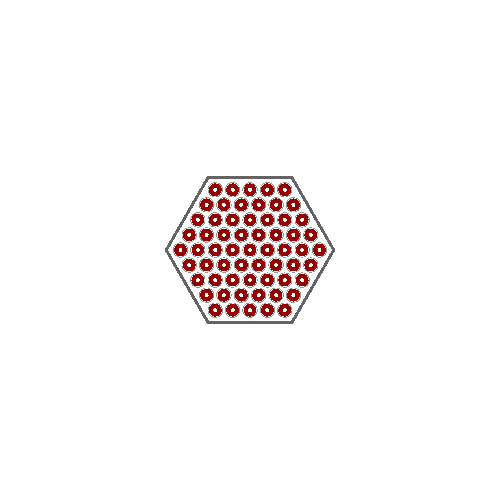

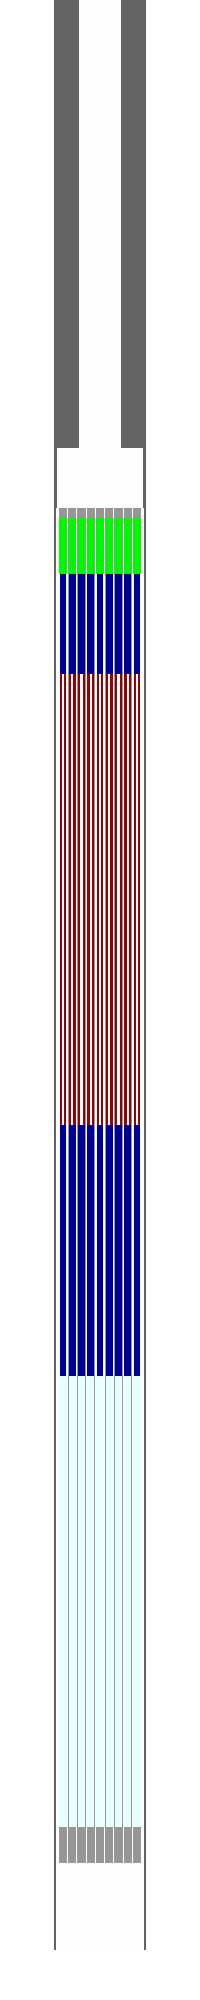

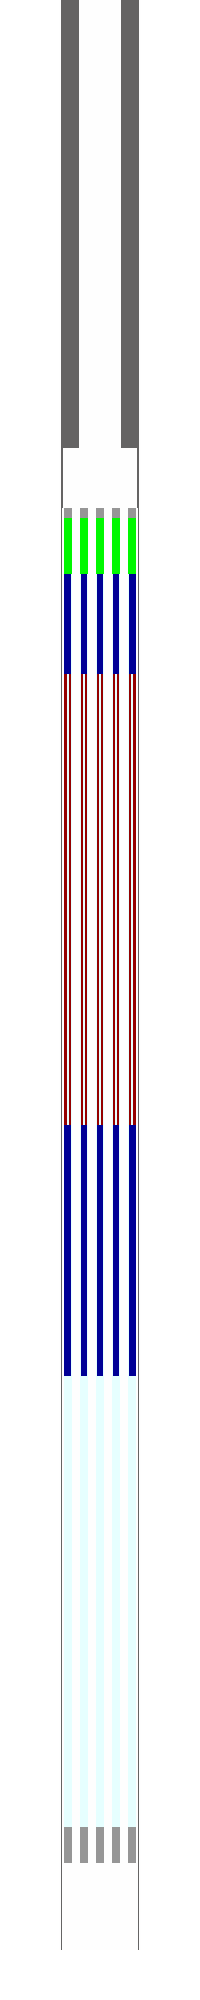

In [9]:
openmc.plot_inline(plot_file)

#### Define for tallies
No need to revise here.

In [10]:
###############################################################################
#                   Exporting to OpenMC tallies.xml File
###############################################################################

# Instantiate a distribcell Tally
tallyUBL = openmc.Tally(tally_id=1)
tallyUBL.filters = [openmc.DistribcellFilter(c_FU_UBL_1)]
tallyUBL.scores = ['kappa-fission', 'flux', 'fission-q-recoverable']

# Instantiate a distribcell Tally
tallyFIS = openmc.Tally(tally_id=2)
tallyFIS.filters = [openmc.DistribcellFilter(c_FU_FIS_1)]
tallyFIS.scores = ['kappa-fission', 'flux', 'fission-q-recoverable']

# Instantiate a distribcell Tally
tallyLBL = openmc.Tally(tally_id=3)
tallyLBL.filters = [openmc.DistribcellFilter(c_FU_LBL_1)]
tallyLBL.scores = ['kappa-fission', 'flux', 'fission-q-recoverable']

# Instantiate a distribcell Tally
tallyE = openmc.Tally(tally_id=4)

energy_filter = openmc.EnergyFilter([
1.000000E-05, 
4.174600E-01,
5.315800E-01,
3.927900E+00,
8.315300E+00,
1.371000E+01,
2.260300E+01,
3.726700E+01,
6.144200E+01,
1.013000E+02,
1.670200E+02,
2.753600E+02,
4.540000E+02,
7.485200E+02,
1.234100E+03,
2.034700E+03,
3.354600E+03,
5.530800E+03,
9.118800E+03,
1.503400E+04,
2.478700E+04,
4.086800E+04,
6.737900E+04,
1.110900E+05,
1.831600E+05,
3.019700E+05,
4.978700E+05,
8.208500E+05,
1.353400E+06,
2.231300E+06,
3.678800E+06,
6.065300E+06,
1.000000E+07,
1.419100E+07
]) # ANL 33-group structure
tallyE.filters = [energy_filter]
tallyE.scores = ['flux']

tally_global = openmc.Tally(tally_id=5)
tally_global.scores = ['kappa-fission']

# Instantiate a Tallies collection and export to XML
tallies_file = openmc.Tallies([tallyUBL,tallyFIS,tallyLBL,tallyE,tally_global])
tallies_file.export_to_xml()

In [11]:
model = openmc.Model(settings=settings_file, geometry=geometry, materials=materials_file, tallies=tallies_file)

In [12]:
model.settings.particles = 1000

In [ ]:
sp_filename = model.run()

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

#### Postprocessing
Input for visualizating pin power. You can use this input without revision, and use as presentation materials.
As further activity, please plot neutron flux spectrum. The data is pregenerated as tallyE above.

In [ ]:
import openmc
import openmc.lib
def display_pin_powers(statepoint_file):

    with openmc.StatePoint(statepoint_file, autolink=False) as sp:
        tallyUBL_out = sp.get_tally(id=tallyUBL.id)
        tallyFIS_out = sp.get_tally(id=tallyFIS.id)
        tallyLBL_out = sp.get_tally(id=tallyLBL.id)
        tallyE_out = sp.get_tally(id=tallyE.id)
        tally_global_out = sp.get_tally(id=tally_global.id)
        
        total_kappa_fission = tally_global_out.get_values(scores=['kappa-fission']).flatten()[0]

        reactor_power = 65 / 79 * 1e6 # [W] (zero power test)

        fuel_pin_powers = reactor_power * (tallyFIS_out.get_values(scores=['kappa-fission']).flatten() / total_kappa_fission)
        upper_blanket_pin_powers = reactor_power * (tallyUBL_out.get_values(scores=['kappa-fission']).flatten() / total_kappa_fission)
        lower_blanket_pin_powers = reactor_power * (tallyLBL_out.get_values(scores=['kappa-fission']).flatten() / total_kappa_fission)
    
        def plot_power(pin_power_mean, cell, origin):       
        
            try:
                print('Initializing OpenMC...')
                openmc.lib.init(['-c'])
                print('Done')
                p = openmc.lib.plot._PlotBase()
                p.origin = origin
                p.width = 7
                p.height = 7
                p.h_res = 400
                p.v_res = 400
                p.colorby = 'cell'
                p.basis = 'xy'
                print('Generating id map...')
                id_mapping = openmc.lib.id_map(p)
                print('Done')
            finally:
                print('Shutting down OpenMC...')
                openmc.lib.finalize()
                print('Done')
    
            cell_map = id_mapping[:, :, 0]
            instance_map = id_mapping[:, :, 1]
            fuel_mask = cell_map == cell.id
            power_mapping = np.zeros_like(cell_map)
            
            for i, h in enumerate(pin_power_mean.flatten()):
                instance_mask = instance_map == i
                power_mapping[np.logical_and(fuel_mask, instance_mask)] = h
    
            plt.figure(figsize=(10,10))
            img = plt.imshow(power_mapping, extent=[-3.5, 3.5, -3.5, 3.5])
            plt.ylabel('Y')
            plt.xlabel('X')
            plt.colorbar(img, label='Power (W)')
            plt.show()

        plot_power(fuel_pin_powers, c_FU_FIS_1, (0.0, 0.0, 120.0))
        plot_power(upper_blanket_pin_powers, c_FU_UBL_1, (0.0, 0.0, 130.0))
        plot_power(lower_blanket_pin_powers, c_FU_LBL_1, (0.0, 0.0, 80.0))

In [ ]:
display_pin_powers('statepoint.120.h5')